*This notebook is part of the [Programming Paradigms](https://www.ufsm.br/ementario/disciplinas/ELC117/) course offered by Professor Andrea Schwertner Charão, from the [Department of Languages and Computer Systems](https://www.ufsm.br/unidades-universitarias/ct/departamentos/dlsc/equipe) at the [Federal University of Santa Maria](http://www.ufsm.br), Brazil.*

<img align="right" style="padding-right:10px;" width="100px" src="https://www.swi-prolog.org/icons/swipl.png">

# Try Prolog Web Examples on Google Colab!


Prolog is not a popular language for Web applications (clients/servers), but you might be surprised at how easily this can be done with the help of a few libraries included in [SWI-Prolog](https://www.swi-prolog.org/). There are great tutorials on this subject, usually focused on running Prolog on localhost. One might be tempted to use [SWISH](https://swish.swi-prolog.org/), the amazing web based environment for running SWI-Prolog on the cloud, but its sandboxing security mechanism prevents programs to transfer HTTP requests/responses. Fortunately, we can try this on Google Colab!

## Installing SWI-Prolog

Google Colab doesn't have SWI-Prolog installed, but this can be easily done.

In [ ]:
!apt install swi-prolog

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base intltool-debian
  javascript-common libarchive-cpio-perl libarchive-zip-perl libbsd-dev
  libedit-dev libfile-stripnondeterminism-perl libgmp-dev libgmpxx4ldbl
  libjs-jquery libmagic-mgc libmagic1 libmail-sendmail-perl libncursesw5-dev
  libossp-uuid16 libsigsegv2 libsys-hostname-long-perl libtimedate-perl
  libtool m4 po-debconf swi-prolog-nox swi-prolog-x
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc dh-make dwz gettext-doc
  libasprintf-dev libgettextpo-dev apache2 | lighttpd | httpd gmp-doc
  libgmp10-doc libmpfr-dev ncurses-doc uuid libtool-doc gcj-jdk m4-doc
  li

🟥 You will have to reinstall SWI-Prolog every time Google Colab disconnect you from a Runtime! Fortunately, the installation does not take long.

## Running HTTP clients

Let's try a few example HTTP clients.

### Example from SWI-Prolog docs

The [SWI-Prolog HTTP Support](https://www.swi-prolog.org/pldoc/doc_for?object=section(%27packages/http.html%27)) documentation provides many examples. Let's try one from https://www.swi-prolog.org/pldoc/man?section=http-clients - a simple example to fetch a web-page resulting from a Google search. This example uses the `http_open` library.

First we have to save our Prolog code:

In [ ]:
%%writefile client.pl
% https://www.swi-prolog.org/pldoc/man?section=http-clients
:- use_module(library(http/http_open)).

main :-
  http_open('http://www.google.com/search?q=prolog', In, []),
  copy_stream_data(In, user_output), 
  close(In).

Writing client.pl


Then we'll be able to run our client:

Welcome to SWI-Prolog (threaded, 64 bits, version 7.6.4)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit http://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

<!doctype html><html lang="zh-TW"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>prolog - Google &#25628;&#23563;</title><script nonce="aoZpBMd2ipdtNY5Hv-vXgA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDe
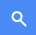
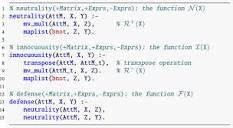
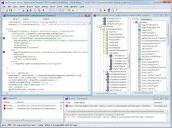

In [ ]:
!swipl -s client.pl -t "main"

### GET request to a free API

Let's try a free public API listed in https://apipheny.io/free-api/  

Using www.ipify.org we may be able to get the public IP address of our Google Colab runtime server! Now we'll be using the `http_client` library.

In [ ]:
%%writefile http-get-ip.pl
:- use_module(library(http/http_client)).

main :-
  http_get('https://api.ipify.org', Response, []),
  write('This Colab\'s Runtime IP address is '), 
  write(Response).

Writing http-get-ip.pl


In [ ]:
!swipl --quiet -s http-get-ip.pl -t "main"

This Colab's Runtime IP address is 35.229.183.158

### GET response in JSON format

What if the GET request returns data in JSON format? Let's try another free public API which returns random Chuck Norris jokes 😄

In [ ]:
%%writefile http-get-joke-json1.pl
:- use_module(library(http/http_client)).

main :-
  http_get('https://api.chucknorris.io/jokes/random?category=dev', List, []),
  write(List).

Writing http-get-joke-json1.pl


In [ ]:
!swipl --quiet -s http-get-joke-json1.pl -t "main"

{"categories":["dev"],"created_at":"2020-01-05 13:42:19.324003","icon_url":"https://assets.chucknorris.host/img/avatar/chuck-norris.png","id":"ughqsstqtmihbbknicskaq","updated_at":"2020-01-05 13:42:19.324003","url":"https://api.chucknorris.io/jokes/ughqsstqtmihbbknicskaq","value":"Chuck Norris doesn't needs try-catch, exceptions are too afraid to raise."}

A classic use case is to parse the JSON response to get the fields we need. This can be easily done with the `http_json` library in SWI-Prolog. **When this library is loaded, the `http_get` predicate will give us a slightly different result. Could you spot the difference?**

In [ ]:
%%writefile http-get-joke-json2.pl
:- use_module(library(http/http_client)).
:- use_module(library(http/http_json)).

main :-
  http_get('https://api.chucknorris.io/jokes/random?category=dev', List, []),
  write(List).

Writing http-get-joke-json2.pl


In [ ]:
!swipl --quiet -s http-get-joke-json2.pl -t "main"

json([categories=[dev],created_at=2020-01-05 13:42:19.324003,icon_url=https://assets.chucknorris.host/img/avatar/chuck-norris.png,id=iy5n_afwrrqrj9wb6n21ww,updated_at=2020-01-05 13:42:19.324003,url=https://api.chucknorris.io/jokes/iy5n_afwrrqrj9wb6n21ww,value=Chuck Norris doesn't need garbage collection because he doesn't call .Dispose(), he calls .DropKick().])

Now we are able to process the JSON response to get the `value` field containing the actual joke.

In [ ]:
%%writefile http-get-joke.pl
:- use_module(library(http/http_client)).
:- use_module(library(http/http_json)).

main :-
  http_get('https://api.chucknorris.io/jokes/random?category=dev', json(List), []),
  member(value=V, List),
  write(V).

Writing http-get-joke.pl


In [ ]:
!swipl --quiet -s http-get-joke.pl -t "main"

Chuck Norris can dereference NULL.

### Another GET request example

Let's combine two free public APIs:  ipify for getting our public IP address and ipinfo which gives IP address data. 

In [ ]:
%%writefile http-get-ipinfo.pl
:- use_module(library(http/http_client)).
:- use_module(library(http/http_json)).

main :-
  http_get('https://api.ipify.org/?format=json', json([ip=IP]), []),
  atomic_list_concat(['https://ipinfo.io/', IP, '/geo'], Url),
  http_get(Url, Json, []),
  writeln('JSON Response:'),
  writeln(Json),
  Json = json(List), 
  member(country=Country, List), write('Country: '), writeln(Country),
  member(region=Region, List), write('Region: '), writeln(Region),
  member(city=City, List), write('City: '), writeln(City).

Writing http-get-ipinfo.pl


In [ ]:
!swipl --quiet -s http-get-ipinfo.pl -t "main"

JSON Response:
json([ip=35.229.183.158,hostname=158.183.229.35.bc.googleusercontent.com,city=Taipei,region=Taiwan,country=TW,loc=25.0478,121.5319,org=AS396982 Google LLC,timezone=Asia/Taipei,readme=https://ipinfo.io/missingauth])
Country: TW
Region: Taiwan
City: Taipei


## Running HTTP servers

This code from https://www.monolune.com/articles/web-programming-in-swi-prolog/ is an example HTTP server which returns `Hello` and a timestamp:

In [ ]:
%%writefile server.pl
% https://www.monolune.com/articles/web-programming-in-swi-prolog/

:- use_module(library(http/thread_httpd)).
:- use_module(library(http/http_dispatch)).
:- use_module(library(http/html_write)).

% URL handlers.
:- http_handler('/', handle_request, []).

% Request handlers.
handle_request(_Request) :-
    get_time(X),  % X = seconds elapsed since the epoch.
    reply_html_page(
        [title('Hello')],
        [h1('Hello'), p(X)]
    ).

server(Port) :-
    http_server(http_dispatch, [port(Port)]).

:- initialization(server(8000)).

When SWI-Prolog loads this program, it calls the `initialization` predicate and prompts for more commands - but the interactive prompt blocks the code cell in Colab. Let's try to circunvent this limitation.

This example from https://www.metalevel.at/letswicrypt/ also creates an HTTP server, but in this case the server runs as a daemon process (a background process without direct control of an interactive user). This prevents SWI-Prolog to run the interactive prompt.

In [ ]:
%%writefile serverdaemon.pl
%https://www.metalevel.at/letswicrypt/
:- use_module(library(http/http_unix_daemon)).
:- use_module(library(http/thread_httpd)).
:- use_module(library(http/http_dispatch)).

:- http_handler(/, handle_request, [prefix]).

handle_request(_Request) :-
        format("Content-type: text/plain~n~n"),
        format("Hello!").

Writing serverdaemon.pl


To run this example on Google Colab, we need to provide a port AND a username other than root (Google Colab default user is root, but running the server as root is not allowed). Fortunately, we are able to use the existing `daemon` user.

In [ ]:
!swipl serverdaemon.pl --port=8081 --user=daemon

Let's check if our server is actually running:

In [ ]:
!ps -waux | grep swipl

daemon      2899  0.0  0.0 142652 10568 ?        Ssl  17:46   0:00 swipl serverdaemon.pl --port=8081 --user=daemon
root        2906  0.0  0.0  39200  6544 ?        S    17:46   0:00 /bin/bash -c ps -waux | grep swipl


And we'll finally be able to test our server:

In [ ]:
!curl localhost:8081

Hello!

## Where do we go from here?

This notebook shows it is possible to run SWI-Prolog HTTP client/server on Google Colab. Our goal is to show some interesting SWI-Prolog capabilities to beginner Prolog students, without requiring to install any software. 

### More to try

- Find a public API returning a JSON array, then parse it as a Prolog list. For example: http://universities.hipolabs.com/search?country=Brazil 
- Use the results from a public API to assert clauses in a Prolog database.
- Use [`load_html`](https://www.swi-prolog.org/pldoc/man?predicate=load_html/3) and [`xpath`](https://www.swi-prolog.org/pldoc/man?predicate=xpath/3)  to parse and navigate HTML documents. 

- ...


### Tutorials

- [Creating Web Applications in SWI-Prolog](https://github.com/Anniepoo/swiplwebtut/blob/master/web.adoc) by Anne Ogborn. 
- [Prolog Web Applications](https://www.metalevel.at/prolog/web) by Markus Triska. The examples use Scryer Prolog, but most of them may also run on SWI-Prolog.
- [Web scraping with Prolog](https://www.youtube.com/watch?v=zKrw-pRI9ac), video by Markus Triska.
- [How to create a web service easily?](https://www.swi-prolog.org/howto/http/) by SWI-Prolog contributors.